In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import numpy as np
import re
import os
sns.set_style("darkgrid")

In [14]:
COLUMNS = ['period', 'wifi', 'Stack', 'Mbps']

In [15]:
runs = os.listdir('./formated_data')
experiments = {key: list(group) for key, group in itertools.groupby(runs, key=lambda exp_run: exp_run[:-6])}

In [16]:
print(experiments.keys())

dict_keys(['A1I1M1', 'A1I1M2', 'A1I1M3', 'A1I2M1', 'A1I2M2', 'A1I2M3', 'A2I1M1', 'A2I1M2', 'A2I1M3', 'A2I2M1', 'A2I2M2', 'A2I2M3', 'A3I1M1', 'A3I1M2', 'A3I1M3', 'A3I2M1', 'A3I2M2', 'A3I2M3'])


In [17]:
experiments_df = {key: pd.concat([pd.read_csv(f'./formated_data/{file_names}', usecols=COLUMNS) for file_names in experiments[key]]) for key in experiments}

In [23]:
keys_group_by_model = {key: list(group) for key, group in itertools.groupby(experiments.keys(), key=lambda exp_run: exp_run[:-2])}
print(keys_group_by_model)

{'A1I1': ['A1I1M1', 'A1I1M2', 'A1I1M3'], 'A1I2': ['A1I2M1', 'A1I2M2', 'A1I2M3'], 'A2I1': ['A2I1M1', 'A2I1M2', 'A2I1M3'], 'A2I2': ['A2I2M1', 'A2I2M2', 'A2I2M3'], 'A3I1': ['A3I1M1', 'A3I1M2', 'A3I1M3'], 'A3I2': ['A3I2M1', 'A3I2M2', 'A3I2M3']}


<AxesSubplot:xlabel='period', ylabel='wifi'>

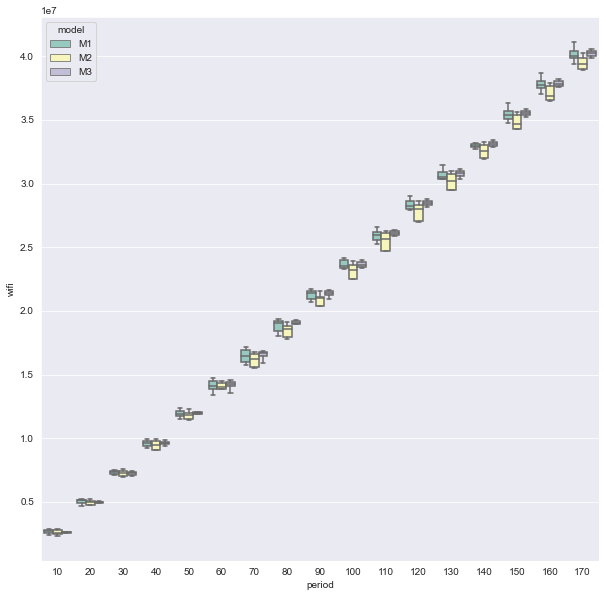

In [40]:
key_groups = {key: list(group) for key, group in itertools.groupby(experiments.keys(), key=lambda exp_run: exp_run[:-2])}
keys = key_groups['A1I1']
for key in keys:
    experiments_df[key]['model'] = key[-2:]
df = pd.concat([experiments_df[key] for key in keys]) 
df = df[df['period'] > 0]
df = df[df['period'] <= 170]
df = df[df['period'] % 10 == 0]
fig, axis = plt.subplots(1, 1, figsize=(10, 10))
sns.boxplot(x='period', y='wifi', hue='model', data=df, palette="Set3", showfliers=False, ax=axis)

In [43]:
def plot_stats(experiments_df, metric, figsize=(24, 24)):
    key_groups = {key: list(group) for key, group in itertools.groupby(experiments.keys(), key=lambda exp_run: exp_run[:-2])}
    for i, key_group in enumerate(key_groups):
        keys = key_groups[key_group]
        for key in keys:
            experiments_df[key]['model'] = key[-2:]
        df = pd.concat([experiments_df[key] for key in keys]) 
        df = df[df['period'] > 0]
        df = df[df['period'] <= 170]
        df = df[df['period'] % 10 == 0]
        fig, axis = plt.subplots(1, 1, figsize=(10, 10))
        sns.boxplot(x='period', y='wifi', hue='model', data=df, palette="Set3", showfliers=False, ax=axis)
        fig.savefig(f'./graphs/{key_group}_{metric}.jpg')

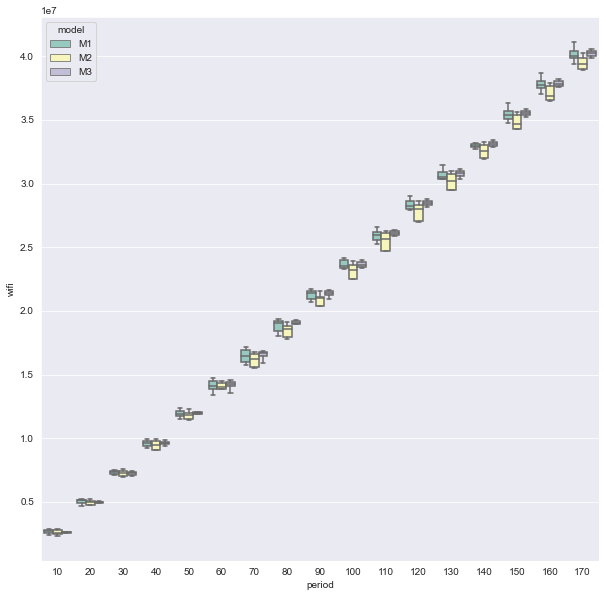

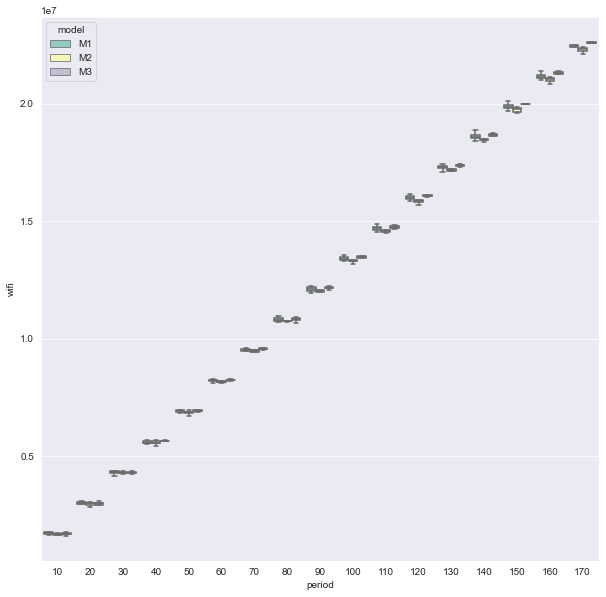

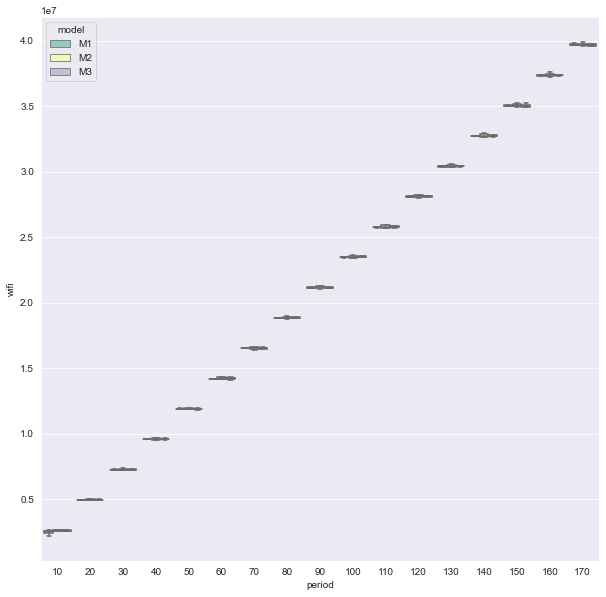

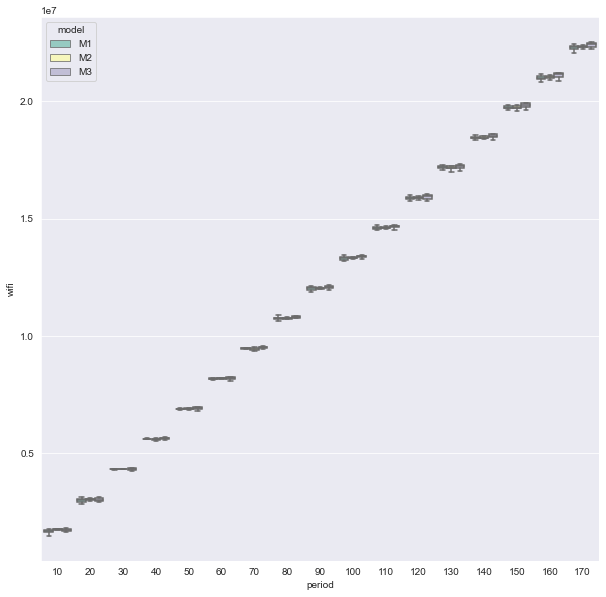

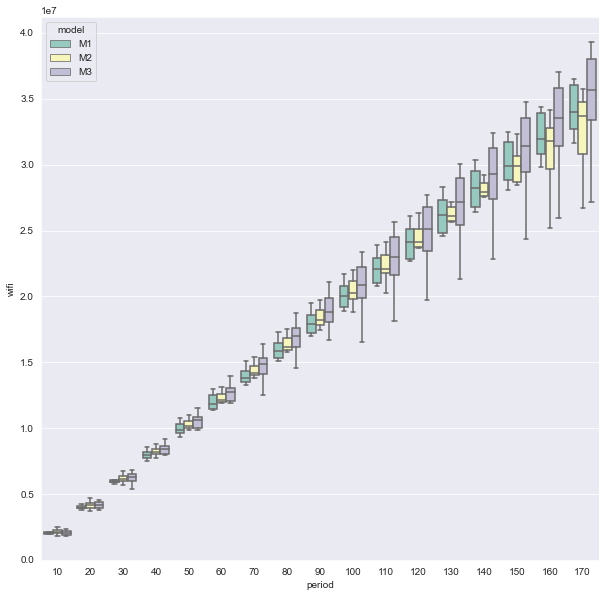

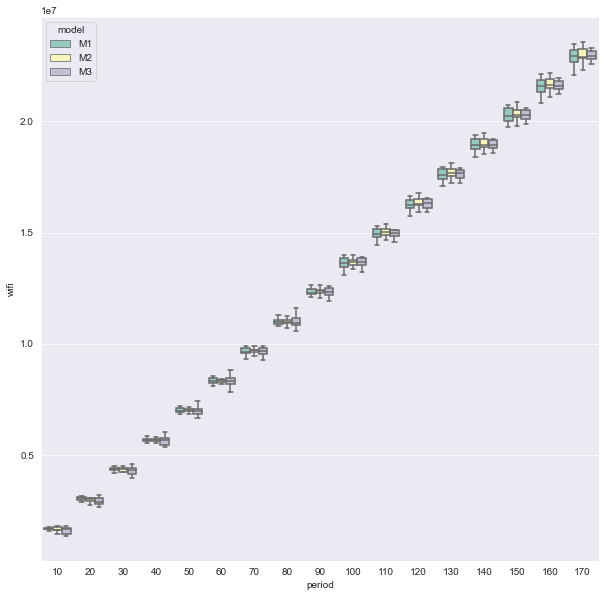

In [44]:
plot_stats(experiments_df, 'wifi')
# 3 x 6
#

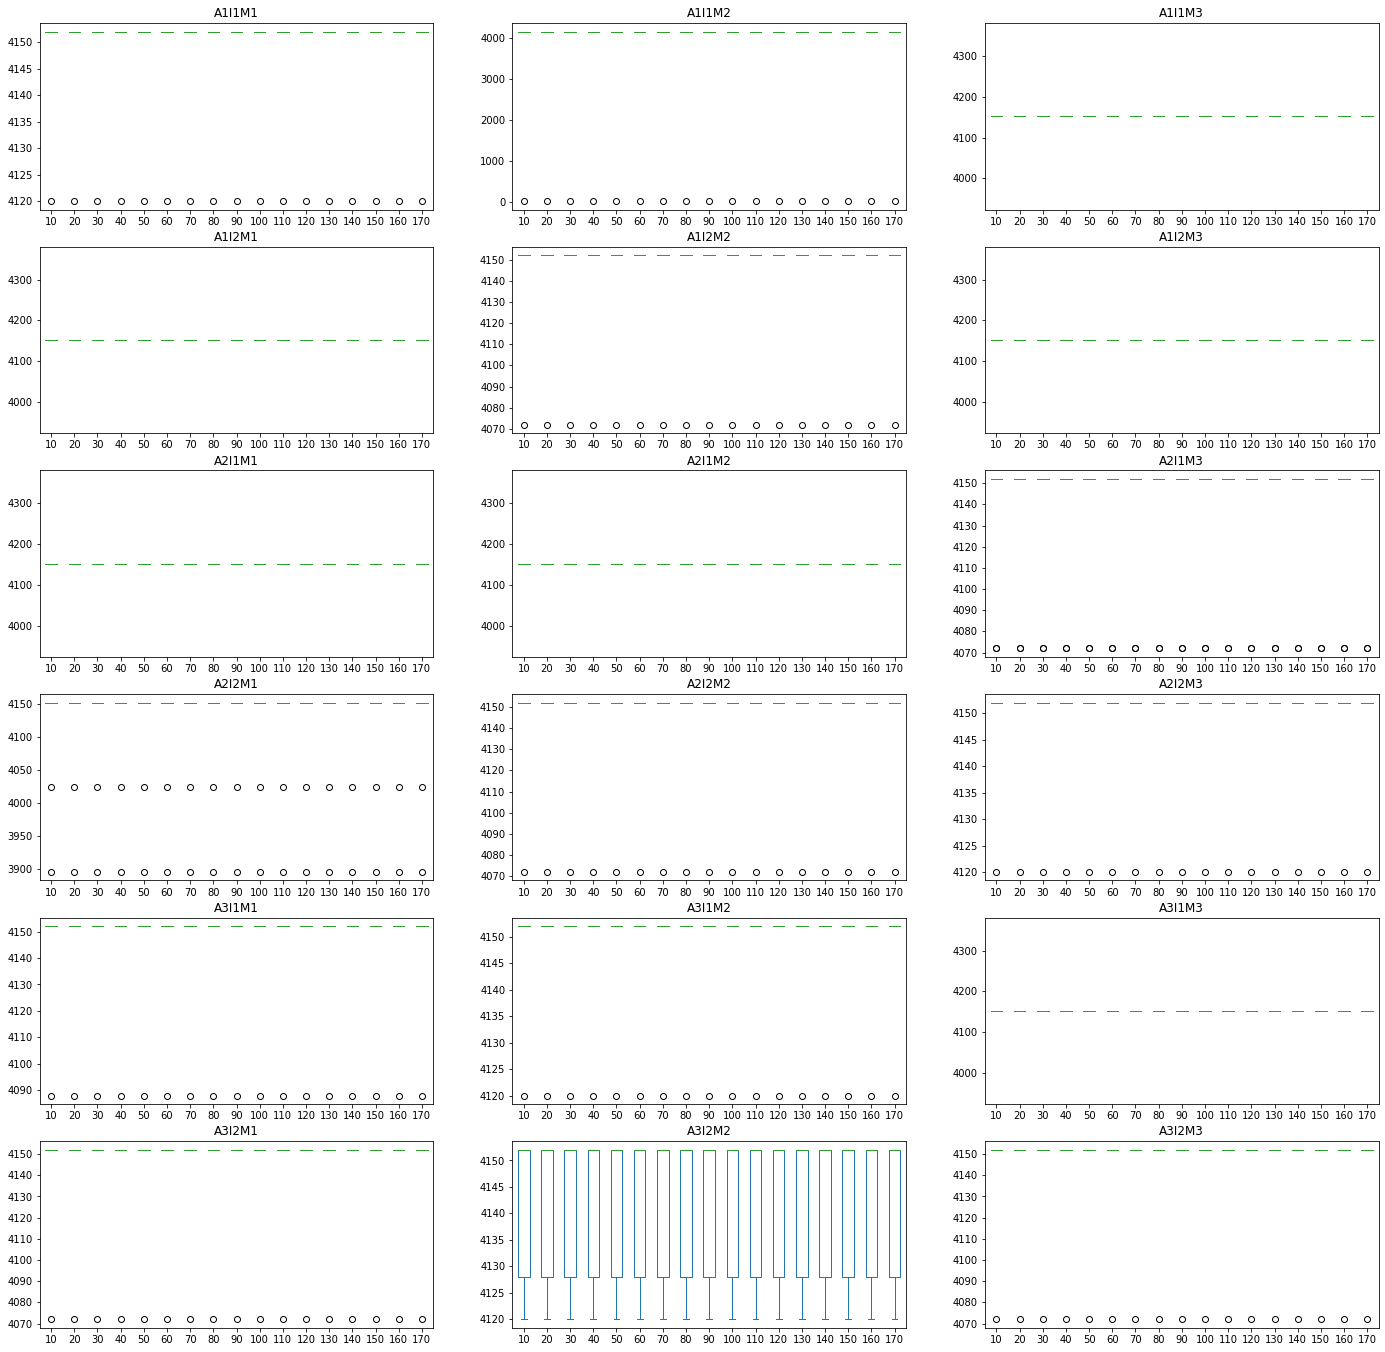

In [ ]:
plot_stats(experiments_df, 'Stack')

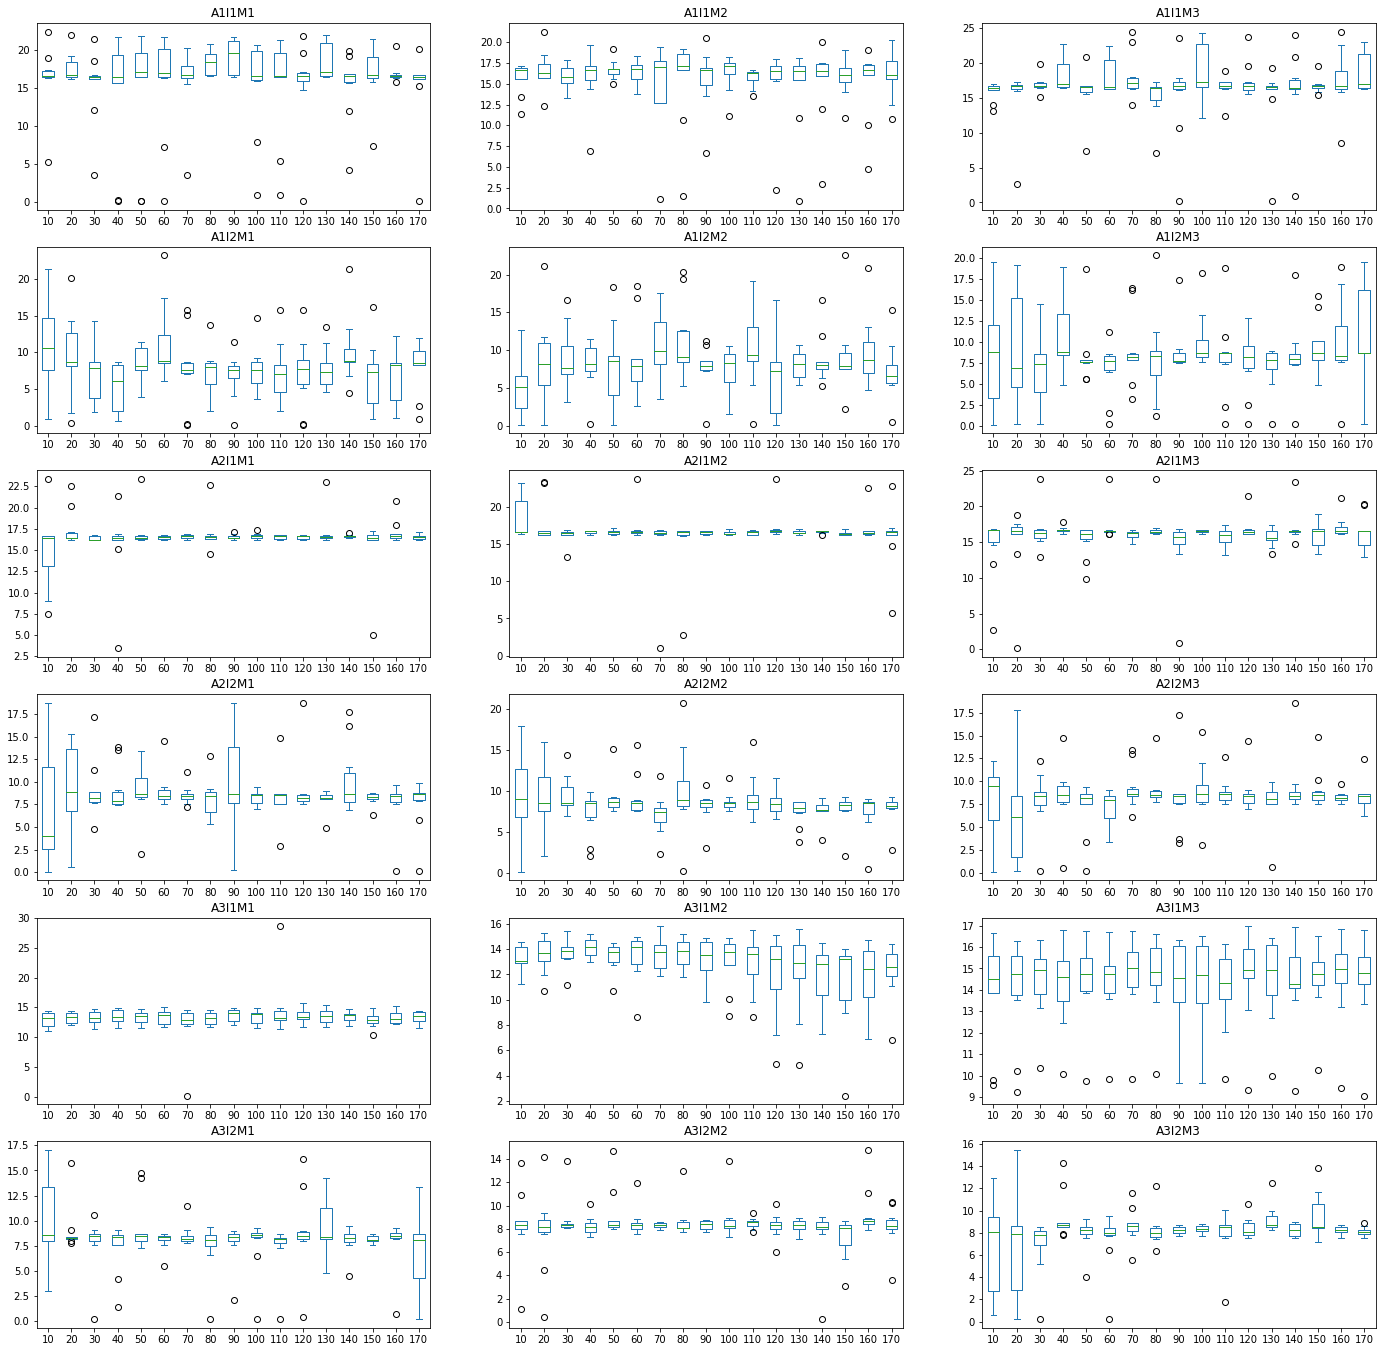

In [ ]:
plot_stats(experiments_df, 'Mbps')